✅ Loaded 130434 rows


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,1618972613292,0,True
1,5.0,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,1308167525000,0,True
2,5.0,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,1615838793006,0,True
3,1.0,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,1405219741000,0,True
4,3.0,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1309029595000,0,False


📊 Missing values:
 rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64
📊 Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']


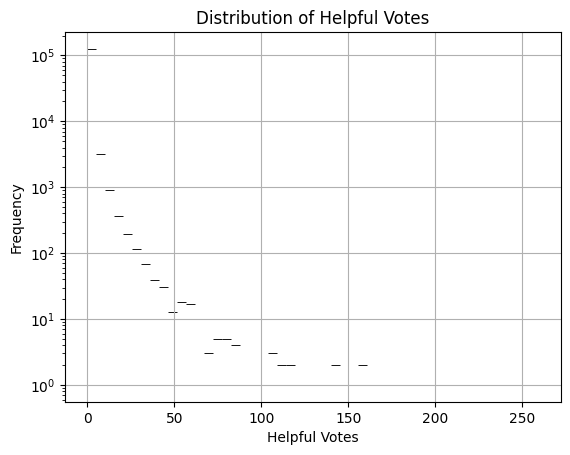

🛑 Reviews with 0 helpful votes: 84993 / 130434 (65.16%)


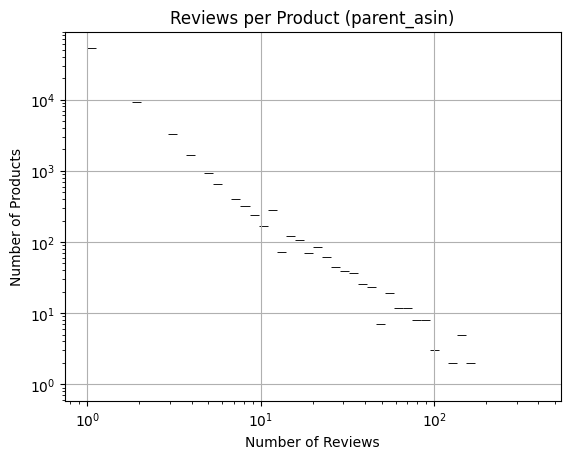

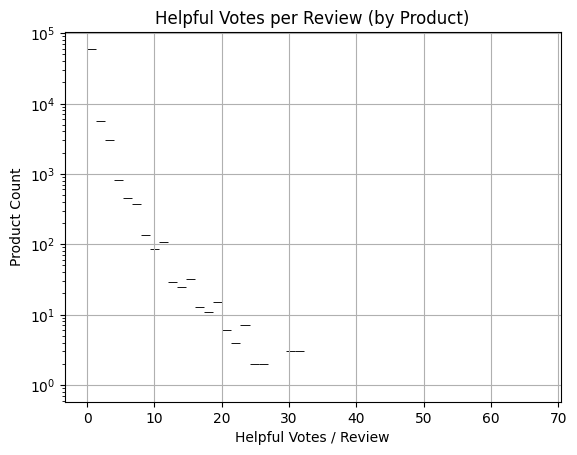

In [2]:
# 🧠 Basic EDA for Amazon Digital Music Reviews

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json

def load_jsonl(path, max_rows=None):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if max_rows and i >= max_rows:
                break
            try:
                data.append(json.loads(line.strip()))
            except json.JSONDecodeError:
                continue
    return pd.DataFrame(data)

# Load the uncompressed JSONL (even if it has .gz extension)
df = load_jsonl("data/Digital_Music.jsonl.gz")
print(f"✅ Loaded {len(df)} rows")

# 🔍 Quick overview
display(df.head())
print("📊 Missing values:\n", df.isnull().sum())
print("📊 Columns:", df.columns.tolist())

# 📈 Helpful vote distribution
sns.histplot(df['helpful_vote'], bins=50, log_scale=(False, True))
plt.title("Distribution of Helpful Votes")
plt.xlabel("Helpful Votes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 📉 Proportion of reviews with 0 helpful votes
zero_helpful = (df['helpful_vote'] == 0).sum()
total = len(df)
print(f"🛑 Reviews with 0 helpful votes: {zero_helpful} / {total} ({zero_helpful/total:.2%})")

# 📦 Reviews per product (parent_asin)
asin_counts = df['parent_asin'].value_counts()
sns.histplot(asin_counts, bins=50, log_scale=(True, True))
plt.title("Reviews per Product (parent_asin)")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Products")
plt.grid(True)
plt.show()

# 💡 Helpfulness vote concentration by product
asin_helpful = df.groupby('parent_asin')['helpful_vote'].sum().sort_values(ascending=False)
asin_review_counts = df['parent_asin'].value_counts()

concentration_df = pd.DataFrame({
    'review_count': asin_review_counts,
    'total_helpful_votes': asin_helpful
}).fillna(0)

concentration_df['helpful_per_review'] = concentration_df['total_helpful_votes'] / concentration_df['review_count']

sns.histplot(concentration_df['helpful_per_review'], bins=50, log_scale=(False, True))
plt.title("Helpful Votes per Review (by Product)")
plt.xlabel("Helpful Votes / Review")
plt.ylabel("Product Count")
plt.grid(True)
plt.show()

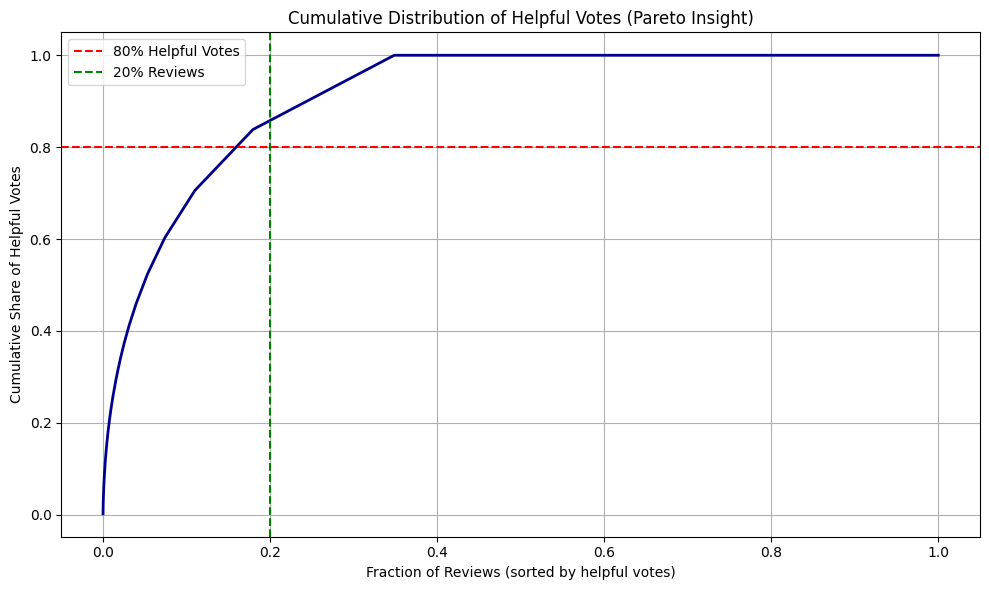

In [3]:
# 📊 Skewness of Helpful Votes (Pareto Insight)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sort reviews by helpful votes
sorted_votes = df["helpful_vote"].sort_values(ascending=False).reset_index(drop=True)

# Calculate cumulative share of helpful votes
cumulative_votes = sorted_votes.cumsum()
total_votes = sorted_votes.sum()
cumulative_share = cumulative_votes / total_votes

# Calculate percentage of reviews
percent_reviews = np.arange(1, len(sorted_votes) + 1) / len(sorted_votes)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=percent_reviews, y=cumulative_share, color="darkblue", linewidth=2)
plt.axhline(0.8, color="red", linestyle="--", label="80% Helpful Votes")
plt.axvline(0.2, color="green", linestyle="--", label="20% Reviews")
plt.xlabel("Fraction of Reviews (sorted by helpful votes)")
plt.ylabel("Cumulative Share of Helpful Votes")
plt.title("Cumulative Distribution of Helpful Votes (Pareto Insight)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

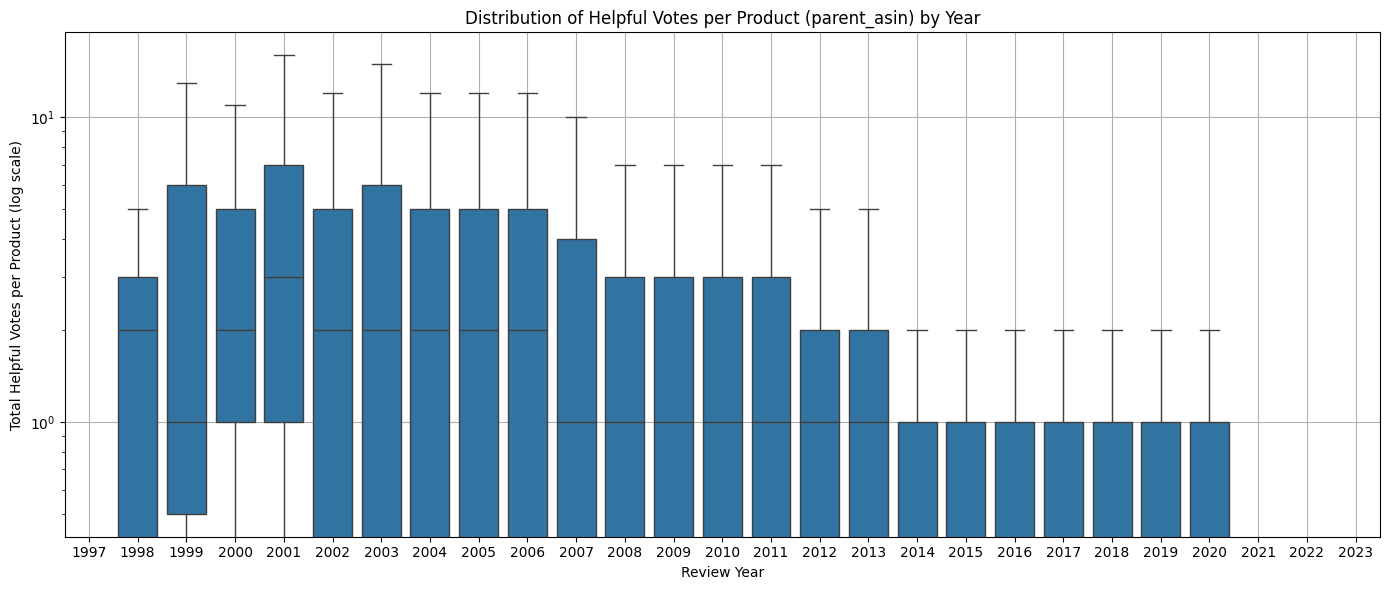

In [4]:
# 🗓️ Extract year from timestamp (if not already done)
df["year"] = pd.to_datetime(df["timestamp"], unit="ms").dt.year

# 🎯 Group by year and parent_asin
grouped = df.groupby(["year", "parent_asin"])["helpful_vote"].sum().reset_index()

# 📈 Plot: Helpful votes per parent_asin per year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=grouped,
    x="year",
    y="helpful_vote",
    showfliers=False  # hide extreme outliers for readability
)
plt.yscale("log")  # helpful votes are likely to be skewed
plt.title("Distribution of Helpful Votes per Product (parent_asin) by Year")
plt.xlabel("Review Year")
plt.ylabel("Total Helpful Votes per Product (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/5p/6h8y8yzn7rxdgn4rkplx53rh0000gn/T/ipykernel_15266/2937550636.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_helpful_votes, x="year", y="helpful_vote", palette="Blues_d")


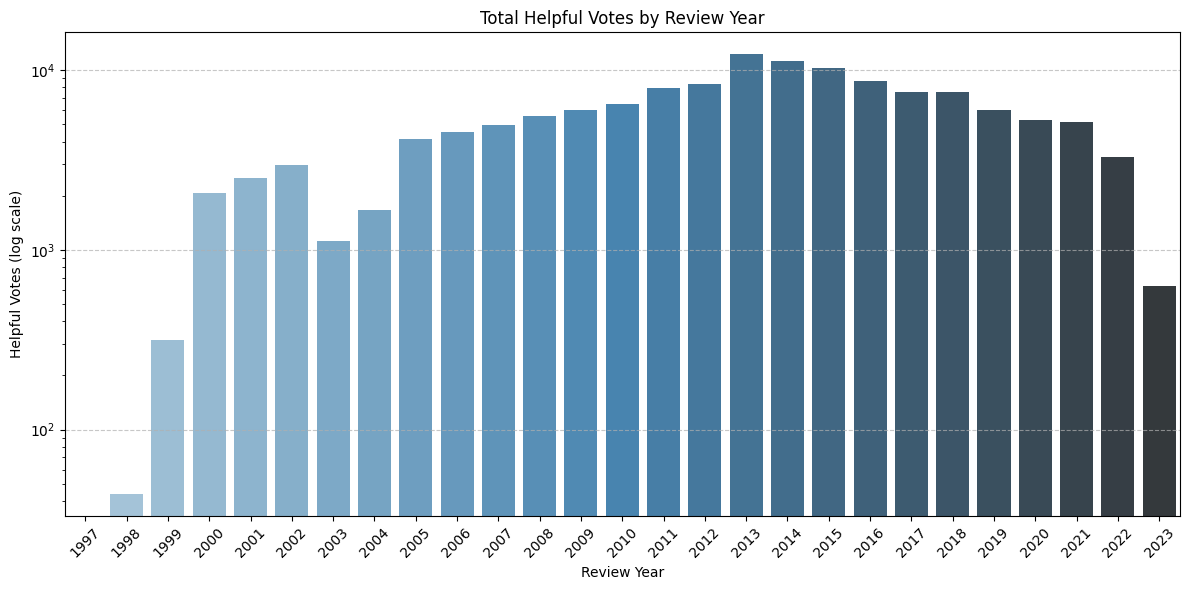

In [8]:
# ⏳ Convert timestamp to year
df["year"] = pd.to_datetime(df["timestamp"], unit="ms").dt.year

# 🧮 Group by year and aggregate total helpful votes per year
yearly_helpful_votes = df.groupby("year")["helpful_vote"].sum().reset_index()

# 📈 Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_helpful_votes, x="year", y="helpful_vote", palette="Blues_d")
plt.yscale("log")
plt.title("Total Helpful Votes by Review Year")
plt.ylabel("Helpful Votes (log scale)")
plt.xlabel("Review Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()